In [1]:
%matplotlib inline

%astropy

import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

Numpy 1.16.0
Astropy 3.2.dev23778


In [2]:
g1 = models.Gaussian1D(1, -1, 0.14)
g2 = models.Gaussian1D(2.5, 1, 0.16)
x = np.linspace(-2, 2, 200)
y = g1(x) + g2(x) + np.random.normal(0., 0.2, x.shape)

In [3]:

g1 = models.Gaussian1D(1, -1, 0.2)
g2 = models.Gaussian1D(2, 1, 0.15)

def tiedfunc(g):
    return g[0].stddev

g2.stddev.tied = tiedfunc

gg_init = g1 + g2


fitter = fitting.SLSQPLSQFitter()
gg_fit = fitter(gg_init, x, y)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7.896453411497821
            Iterations: 11
            Function evaluations: 92
            Gradient evaluations: 11


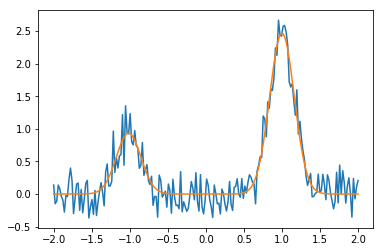

In [4]:
plt.plot(x, y)
plt.plot(x, gg_fit(x))

In [5]:
list(gg_fit)

[<Gaussian1D(amplitude=0.93425624, mean=-1.01512322, stddev=0.16164263)>,
 <Gaussian1D(amplitude=2.46914042, mean=1.00045491, stddev=0.16164263)>]